## Introduction to PCA

The purpose of this notebook is to understand the value of using PCA for data visualization, the first part of this notebook goes over a basic visualization of the IRIS dataset after applying PCA. The second part uses PCA to speed up a machine learning algorithm (logistic regression) on the MNIST dataset.

1. [PCA for Data Visualization](#1)

2. [PCA to Speed-up Machine Learning Algorithms](#2)

## <a name="1">PCA for Data Visualization</a>

For a lot of machine learning applications it helps to be able to visualize our data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part is 4 dimensional. We can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that we can plot and hopefully understand the data better.

**Load dataset**

In [1]:
import pandas as pd

df=pd.read_csv("data/Iris.csv")
df.drop("Id",axis=1,inplace=True)

columns_names=df.columns.tolist()
print("Columns names: \n{}".format(columns_names))
print(df.shape)
df.head()

Columns names: 
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data standardization**

PCA is effected by scale so we need to scale the features in our data before applying PCA. Let's use StandardScaler to standardize the dataset features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [28]:
from sklearn.preprocessing import StandardScaler

features=df.drop("Species",1).columns.tolist()

# Separating out the features
X=df.loc[:,features].values

# Separating out the target
y=df.loc[:,["Species"]].values

# Standardizing the features
X=StandardScaler().fit_transform(X)

**PCA Projection to 2D**

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. After dimensionality reduction, there usually isn't a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [40]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pcomponents=pca.fit_transform(X)

new_df=pd.DataFrame(data=pcomponents,columns=["principal component 1","principal component 2"])

In [33]:
final_df=pd.concat([new_df,df[["Species"]]],axis=1)

**Visualizing species based on principal component 1 and principal component 2**

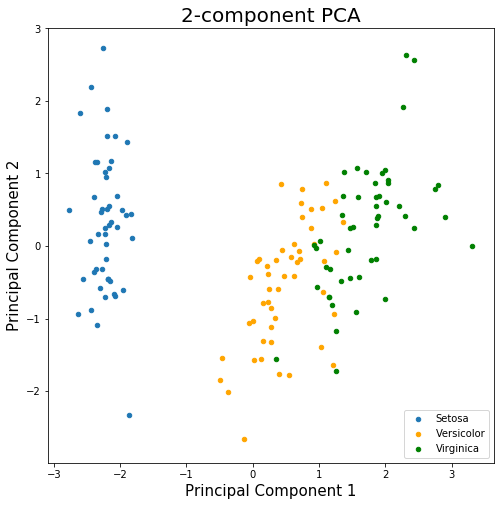

In [37]:
import matplotlib.pyplot as plt

fig=final_df[final_df["Species"]=="Iris-setosa"].plot(kind="scatter",x="principal component 1",y="principal component 2",label="Setosa")
final_df[final_df["Species"]=="Iris-versicolor"].plot(kind="scatter",x="principal component 1",y="principal component 2",label="Versicolor",color="orange",ax=fig)
final_df[final_df["Species"]=="Iris-virginica"].plot(kind="scatter",x="principal component 1",y="principal component 2",label="Virginica",color="green",ax=fig)
fig.set_xlabel("Principal Component 1",fontsize=15)
fig.set_ylabel("Principal Component 2",fontsize=15)
fig.set_title("2-component PCA",fontsize=20)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Explained Variance**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while we can convert 4 dimensional space to 2 dimensional space, we lose some of the variance (information) when we do this. By using the attribute explained_variance_ratio_, we can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [41]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## <a name="2">PCA to Speed-up Machine Learning Algorithms</a>

One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

**Load dataset**

In [9]:
import pandas as pd

train=pd.read_csv("data/mnist_train.csv")
test=pd.read_csv("data/mnist_test.csv")

frames=[train,test]
result=pd.concat(frames)

# columns_names=result.columns.tolist()
# print("Columns names: \n{}".format(columns_names))
print(result.shape)
result.head()

(70000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The images that we downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

**Split the dataset into training set and test set**

In [10]:
from sklearn.model_selection import train_test_split

train_img,test_img,train_lbl,test_lbl=train_test_split(result.drop("label",1),result["label"],test_size=1/7,random_state=0)

**Data standardization**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fit on training set only
scaler.fit(train_img)

# Apply transform to both the training set and the test set
train_img=scaler.transform(train_img)
test_img=scaler.transform(test_img)

**Import and Apply PCA**

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [12]:
from sklearn.decomposition import PCA

pca=PCA(.95)

# Fitting PCA on the training set only
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

We can find out how many components PCA choose after fitting the model using pca.n_components_. In this case, 95% of the variance amounts to 327 principal components.

In [13]:
pca.n_components_

327

Let's apply the mapping (transform) to both the training set and the test set.

In [14]:
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)

**Apply Logistic Regression to the Transformed Data**

In [15]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(train_img,train_lbl)
# Let's predict for one image
clf.predict(test_img[0].reshape(1,-1))

KeyboardInterrupt: 

**Measuring Model Performance**

While accuracy is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity.

In [ ]:
clf.score(test_img,test_lbl)